## Passo 1: Carregar e Examinar o Dataset

Primeiro, vamos carregar os dados e dar uma olhada nas primeiras linhas para entender a estrutura do dataset.

- target = evento de destino de compra (0 não 1 sim).

In [26]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('data/product.csv')

# Mostrar as primeiras linhas do dataset
print(data.head())


                           order_id                           user_id  \
0  cfcd208495d565ef66e7dff9f98764da  c81e728d9d4c2f636f067f89cc14862c   
1  c4ca4238a0b923820dcc509a6f75849b  eccbc87e4b5ce2fe28308fd9f2a7baf3   
2  c81e728d9d4c2f636f067f89cc14862c  eccbc87e4b5ce2fe28308fd9f2a7baf3   
3  eccbc87e4b5ce2fe28308fd9f2a7baf3  eccbc87e4b5ce2fe28308fd9f2a7baf3   
4  a87ff679a2f3e71d9181a67b7542122c  eccbc87e4b5ce2fe28308fd9f2a7baf3   

                            page_id           product site_version  \
0  6f4922f45568161a8cdf4ad2299f6d23          sneakers      desktop   
1  4e732ced3463d06de0ca9a15b6153677          sneakers      desktop   
2  5c45a86277b8bf17bff6011be5cfb1b9  sports_nutrition      desktop   
3  fb339ad311d50a229e497085aad219c7           company      desktop   
4  fb339ad311d50a229e497085aad219c7           company      desktop   

                  time         title  target  
0  2019-01-11 09:24:43  banner_click       0  
1  2019-01-09 09:38:51   banner_show       0  

## Passo 2: Limpeza de Dados

Identificar e tratar valores nulos ou inconsistentes, se houver.

In [27]:
# Verificar valores nulos
#print(data.isnull().sum())

# Tratar valores nulos (se necessário)
data = data.dropna()  # ou data.fillna(valor)

#Limpar colunas sem importancia
dataClean = data.drop(['order_id', 'user_id', 'page_id'], axis=1)

# Converter a coluna 'time' para datetime
print(dataClean.head())

            product site_version                 time         title  target
0          sneakers      desktop  2019-01-11 09:24:43  banner_click       0
1          sneakers      desktop  2019-01-09 09:38:51   banner_show       0
2  sports_nutrition      desktop  2019-01-09 09:12:45   banner_show       0
3           company      desktop  2019-01-03 08:58:18   banner_show       0
4           company      desktop  2019-01-03 08:59:15  banner_click       0


## Passo 3: Análise Exploratória
### 3.1 Análise Univariada
Vamos analisar variáveis individuais para entender melhor sua distribuição e características.

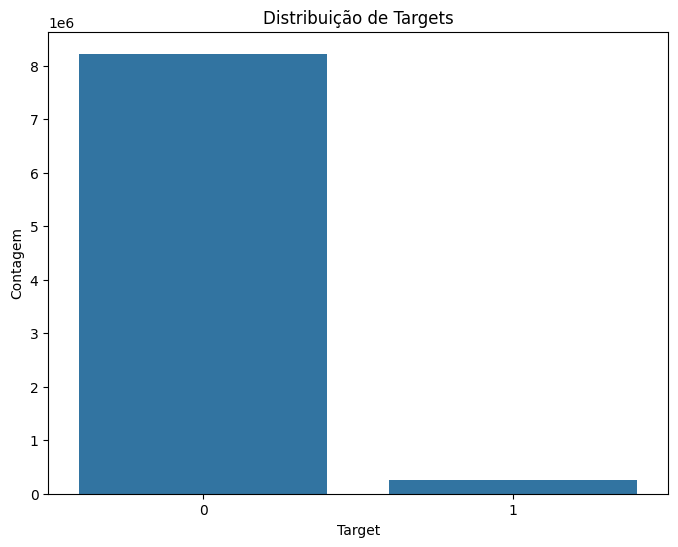

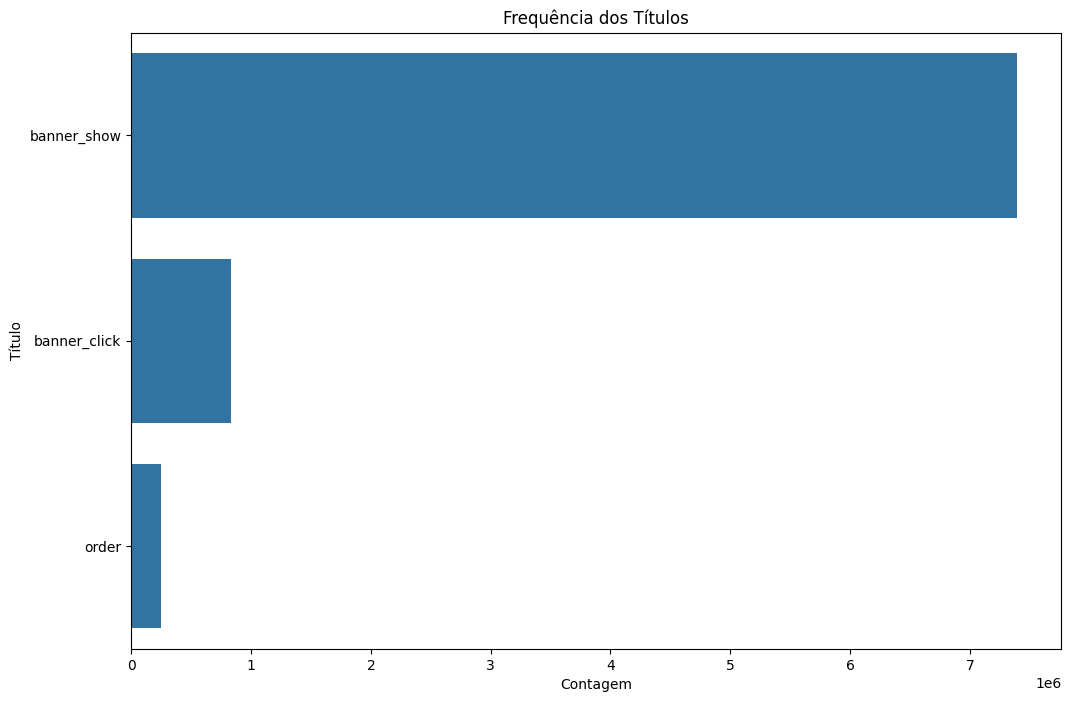

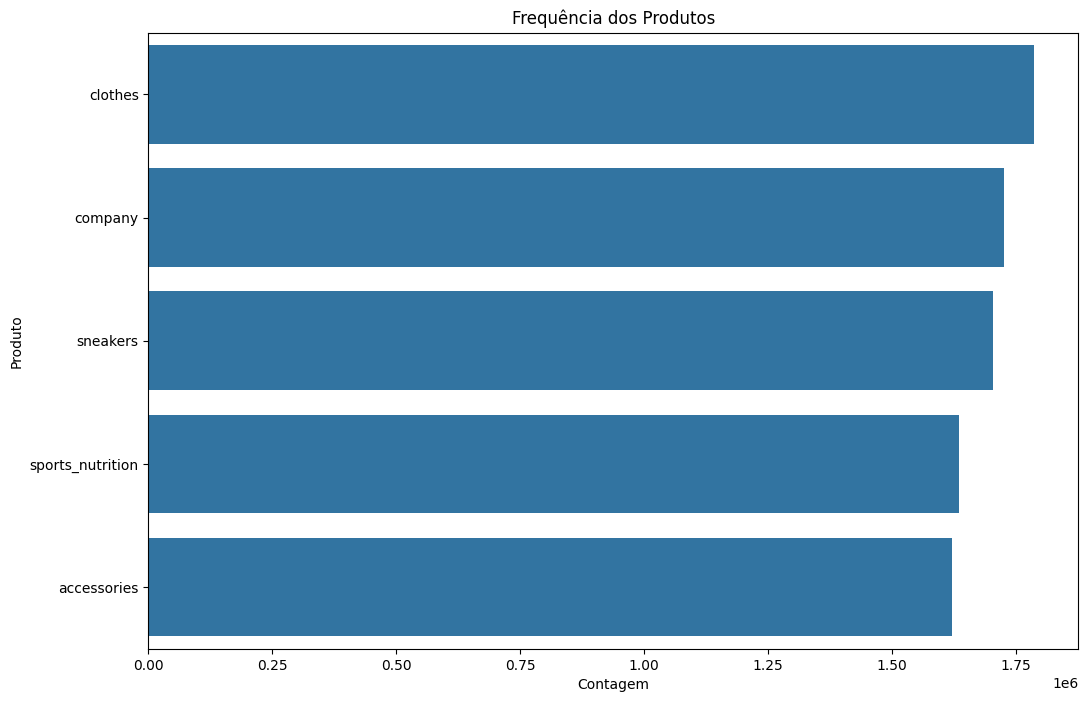

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de targets (compras)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=dataClean)
plt.title('Distribuição de Targets')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

# Frequência de títulos
plt.figure(figsize=(12, 8))
sns.countplot(y='title', data=dataClean, order=dataClean['title'].value_counts().index)
plt.title('Frequência dos Títulos')
plt.xlabel('Contagem')
plt.ylabel('Título')
plt.show()

# Frequência de produtos
plt.figure(figsize=(12, 8))
sns.countplot(y='product', data=dataClean, order=dataClean['product'].value_counts().index)
plt.title('Frequência dos Produtos')
plt.xlabel('Contagem')
plt.ylabel('Produto')
plt.show()


### 3.2 Análise Bivariada
Explorar as relações entre duas variáveis para obter insights mais detalhados.

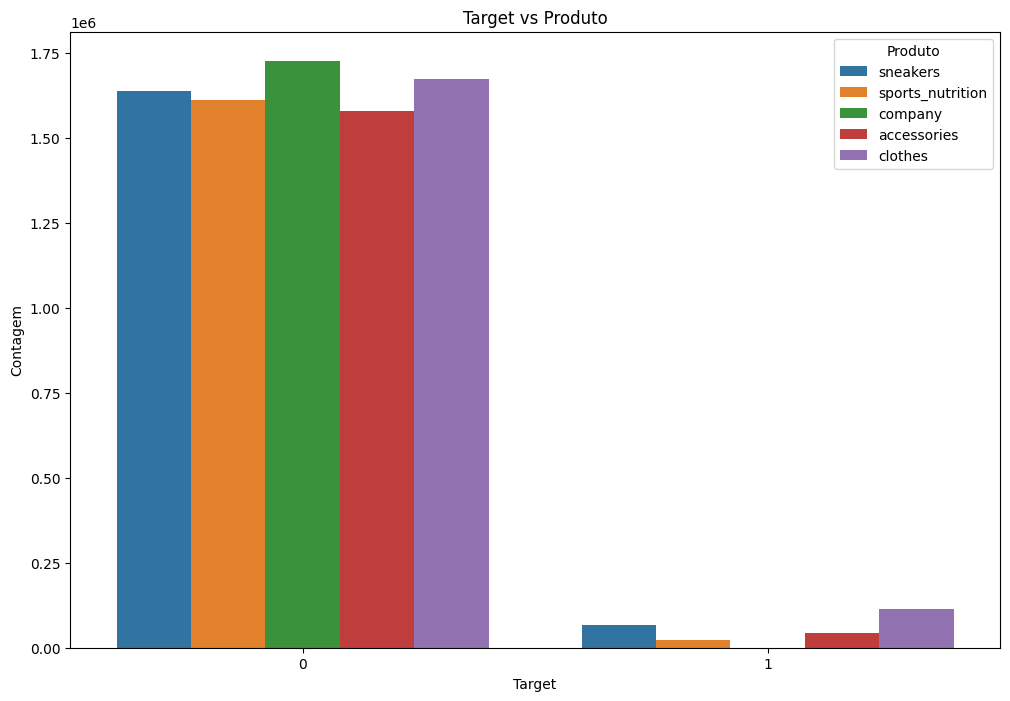

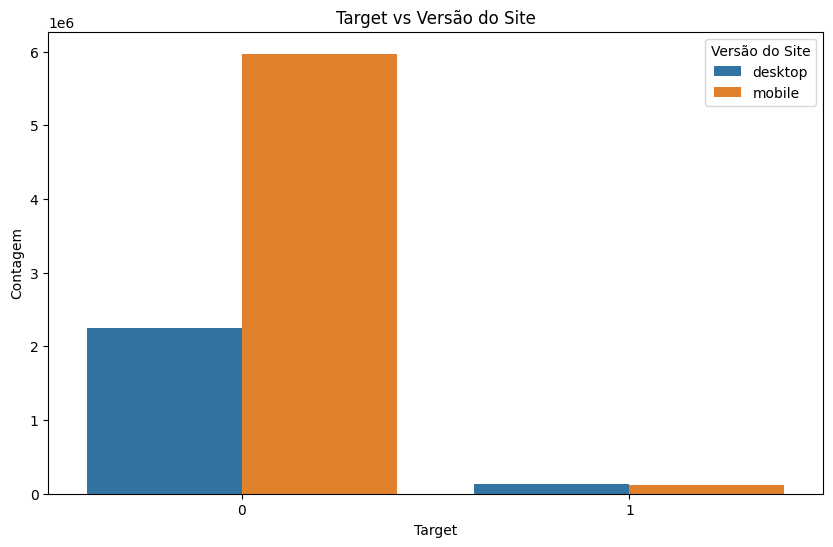

In [29]:
# Target vs Produto
plt.figure(figsize=(12, 8))
sns.countplot(x='target', hue='product', data=dataClean)
plt.title('Target vs Produto')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.legend(title='Produto')
plt.show()

# Target vs Site Version
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='site_version', data=dataClean)
plt.title('Target vs Versão do Site')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.legend(title='Versão do Site')
plt.show()



In [43]:
#Compras realizadas com base no mes e dia 
dataClean['time'] = pd.to_datetime(dataClean['time'])

# Filtrar apenas as compras realizadas (target == 1)
compras_realizadas = dataClean[dataClean['target'] == 1]

# Extrair informações de data (ano, mês, dia)
compras_realizadas['year'] = compras_realizadas['time'].dt.year
compras_realizadas['month'] = compras_realizadas['time'].dt.month
compras_realizadas['day'] = compras_realizadas['time'].dt.day

# Agrupar os dados pela data e contar o número de compras em cada data
compras_por_data = compras_realizadas.groupby(['year', 'month', 'day']).size().reset_index(name='compras')

# Exibir o resultado
print(compras_por_data)

     year  month  day  compras
0    2019      1    1      778
1    2019      1    2      750
2    2019      1    3      812
3    2019      1    4      852
4    2019      1    5      863
..    ...    ...  ...      ...
146  2019      5   27     1260
147  2019      5   28     1282
148  2019      5   29     1259
149  2019      5   30     1189
150  2019      5   31     1071

[151 rows x 4 columns]


C:\Users\morei\AppData\Local\Temp\ipykernel_21632\1687693524.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras_realizadas['year'] = compras_realizadas['time'].dt.year
C:\Users\morei\AppData\Local\Temp\ipykernel_21632\1687693524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras_realizadas['month'] = compras_realizadas['time'].dt.month
C:\Users\morei\AppData\Local\Temp\ipykernel_21632\1687693524.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

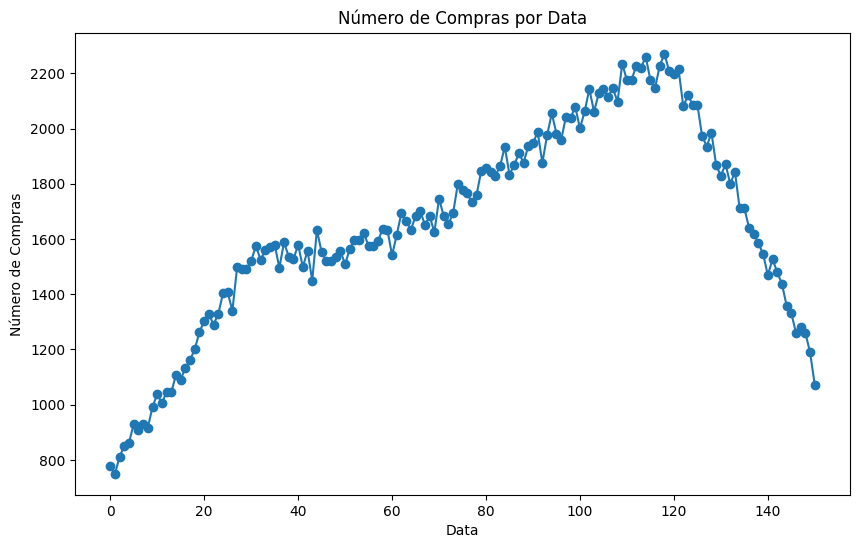

In [44]:
# Plot do grafico

import matplotlib.pyplot as plt

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar o número de compras por data
plt.plot(compras_por_data['compras'], marker='o', linestyle='-')

# Definir o título e os rótulos dos eixos
plt.title('Número de Compras por Data')
plt.xlabel('Data')
plt.ylabel('Número de Compras')

# Exibir o gráfico
plt.show()


## Passo 4: Definir Regras de Negócio
Com base na análise exploratória, podemos criar algumas regras de negócio, como:

- Promoções direcionadas: Oferecer promoções para produtos com menor taxa de conversão.
- Otimização de banners: Focar em banners que têm maior probabilidade de conversão.
- Segmentação por plataforma: Adaptar estratégias de marketing para desktop e mobile com base no comportamento dos usuários.

## Passo 5: Modelo de Machine Learning
Podemos criar um modelo para prever se um cliente realizará uma compra (target).

### 5.1 Preparação dos Dados
Selecionar características relevantes e preparar os dados para o modelo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Codificar variáveis categóricas usando one-hot encoding
X = pd.get_dummies(dataClean[['product', 'site_version', 'title']])
y = dataClean['target']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 5.2 Treinamento e Avaliação do Modelo
Vamos usar um modelo de Random Forest para a tarefa de classificação.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 1.0
Matriz de Confusão:
 [[1644333       0]
 [      0   49911]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1644333
           1       1.00      1.00      1.00     49911

    accuracy                           1.00   1694244
   macro avg       1.00      1.00      1.00   1694244
weighted avg       1.00      1.00      1.00   1694244

